In [30]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Quotes Dataset.csv')
df.head()

,Number,Quote,Author
0,1,The only thing we have to fear is fear itself.,Franklin D. Roosevelt
1,2,The truth will set you free.,The Bible
2,3,To be yourself in a world that is constantly t...,Ralph Waldo Emerson
3,4,"Success is not final, failure is not fatal: It...",Winston S. Churchill
4,5,The only way to do great work is to love what ...,Steve Jobs


In [3]:
df.drop(columns = ['Number'], axis = 1, inplace = True)

In [4]:
df.head()

,Quote,Author
0,The only thing we have to fear is fear itself.,Franklin D. Roosevelt
1,The truth will set you free.,The Bible
2,To be yourself in a world that is constantly t...,Ralph Waldo Emerson
3,"Success is not final, failure is not fatal: It...",Winston S. Churchill
4,The only way to do great work is to love what ...,Steve Jobs


In [5]:
df.shape

(725, 2)

In [6]:
df.isnull().sum()

Quote     0
Author    0
dtype: int64

In [7]:
tokenizer = Tokenizer()

In [8]:
tokenizer.fit_on_texts(df['Quote'])

In [9]:
seq = tokenizer.texts_to_sequences(df['Quote'])

In [10]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

250

In [11]:
seq[0]

[2, 23, 46, 22, 10, 3, 115, 8, 115, 116]

In [12]:
X = []
for i in seq:
    for j in range(len(i)):
        X.append(i[: j + 2])

In [13]:
maxlen = max([len(i) for i in X])
maxlen

24

In [14]:
pad_seq = pad_sequences(X, maxlen = maxlen, padding = 'pre')
pad_seq

array([[ 0,  0,  0, ...,  0,  2, 23],
       [ 0,  0,  0, ...,  2, 23, 46],
       [ 0,  0,  0, ..., 23, 46, 22],
       ...,
       [ 0,  0,  0, ..., 45, 40, 38],
       [ 0,  0,  0, ..., 40, 38, 68],
       [ 0,  0,  0, ..., 40, 38, 68]], dtype=int32)

In [15]:
X_train = pad_seq[:,:-1]

In [16]:
y_train = pad_seq[:,-1]

In [17]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  2, 23],
       [ 0,  0,  0, ...,  2, 23, 46],
       ...,
       [ 0,  0,  0, ..., 67, 45, 40],
       [ 0,  0,  0, ..., 45, 40, 38],
       [ 0,  0,  0, ..., 45, 40, 38]], dtype=int32)

In [18]:
y_train

array([23, 46, 22, ..., 38, 68, 68], dtype=int32)

In [19]:
embedding_matrix = dict()
glove_file = open('glove.6B.100d.txt', encoding = 'utf-8')
for line in glove_file:
    record = line.split()
    word = record[0]
    vector = np.asarray(record[1: ], dtype = 'float32')
    embedding_matrix[word] = vector
glove_file.close()

In [20]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vec = embedding_matrix.get(word)
    if vec is not None:
        embedding_vectors[index] = vec

In [21]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49886   ,  0.76602   ,  0.89750999, ..., -0.41179001,
         0.40538999,  0.78504002],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [-0.38264   , -0.089682  ,  0.024723  , ...,  0.16366   ,
         0.43887001,  0.28924999],
       [ 0.21583   , -0.30496001, -0.15196   , ..., -0.44442999,
         0.65463001,  0.0073575 ],
       [ 0.25882   ,  0.30989   ,  0.62089998, ...,  0.16340999,
         0.49838001,  0.43055001]])

In [24]:
model = Sequential()

In [25]:
model.add(Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False))
model.add(Bidirectional(LSTM(15)))
model.add(Dense(vocab_size, activation = 'softmax'))

In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
early_stopping = EarlyStopping(monitor = 'loss', patience = 5)

In [29]:
history = model.fit(X_train, y_train, epochs = 150, callbacks = [early_stopping])

Epoch 1/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0554 - loss: 4.9685
Epoch 2/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1453 - loss: 3.8121
Epoch 3/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2900 - loss: 3.1039
Epoch 4/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4958 - loss: 2.3923
Epoch 5/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6911 - loss: 1.8459
Epoch 6/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8086 - loss: 1.4111
Epoch 7/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8627 - loss: 1.1208
Epoch 8/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8910 - loss: 0.9193
Epoch 9/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9125 - loss: 0.7714
Epoch 10/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9188 - loss: 0.6733
Epoch 11/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9245 - loss: 0.6231
Epoch 12/150
264/264 ━━━━━━━━

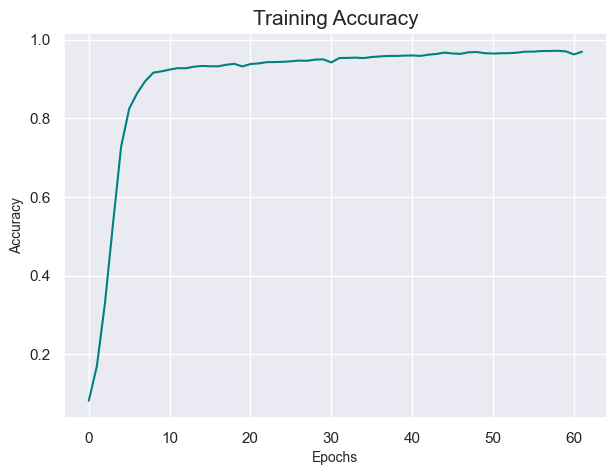

In [32]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], color = 'teal')
plt.title('Training Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.show()

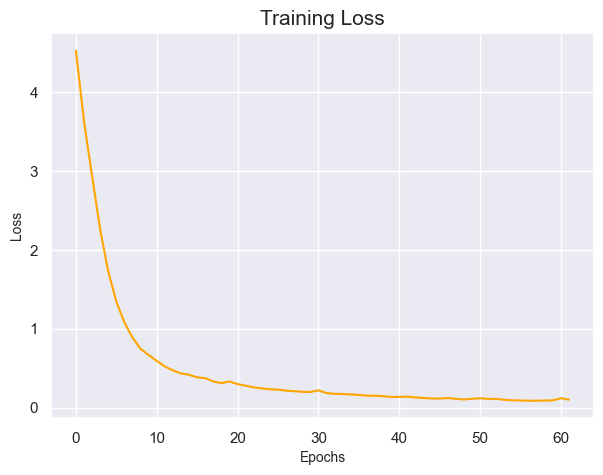

In [33]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], color = 'orange')
plt.title('Training Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.show()

In [55]:
def next_word(text, n):
    te = text
    for i in range(n):
        te_seq = tokenizer.texts_to_sequences([te])[0]
        pad_te = pad_sequences([te_seq], maxlen = maxlen , padding = 'pre')
        pred = np.argmax(model.predict(pad_te))
        for word, index in tokenizer.word_index.items():
            if index == pred:
                ne_word = word
                break
        te = te + ' ' + ne_word
        #f_text.append(ne_word)
        #fu_text = ' '.join(f_text)
        #te = fu_text
    return te

In [56]:
next_word('the only', 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'the only thing standing between you and'

In [57]:
next_word('the truth will', 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'the truth will set you free'

In [58]:
next_word('success is not final', 4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'success is not final failure is not fatal'

In [59]:
next_word('he wants to buy a', 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'he wants to buy a journey of a thousand miles'